In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
PDFset = "GRV98lo_patched"

In [13]:
xs_CC = np.loadtxt(f"../bin/SM/sigma-nu-N-cc-{PDFset}_central.dat")
xs_NC = np.loadtxt(f"../bin/SM/sigma-nu-N-nc-{PDFset}_central.dat")
dxs_CC = np.loadtxt(f"../bin/SM/dsdxdy-nu-N-cc-{PDFset}_central.dat")
dxs_NC = np.loadtxt(f"../bin/SM/dsdxdy-nu-N-nc-{PDFset}_central.dat")

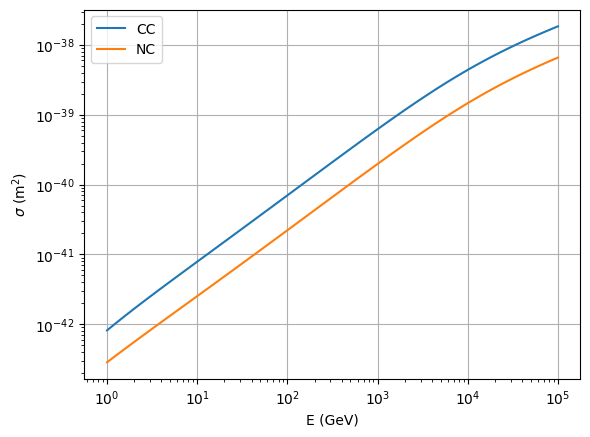

In [17]:
plt.plot(xs_CC[:,0], xs_CC[:,1], label="CC")
plt.plot(xs_NC[:,0], xs_NC[:,1], label="NC")
plt.loglog()
plt.xlabel("E (GeV)")
plt.ylabel(r"$\sigma$ (m$^2$)")
plt.legend()
plt.grid()
plt.show()

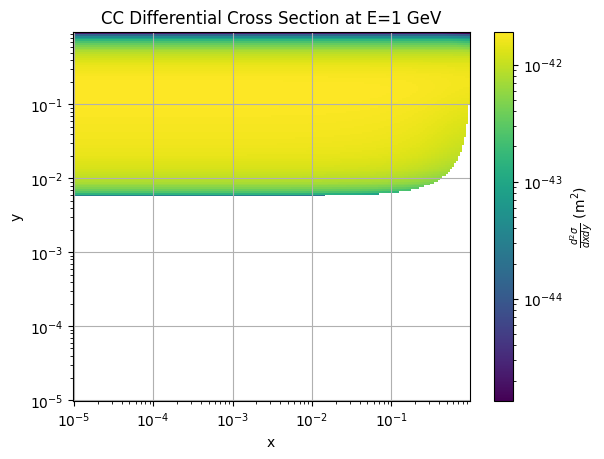

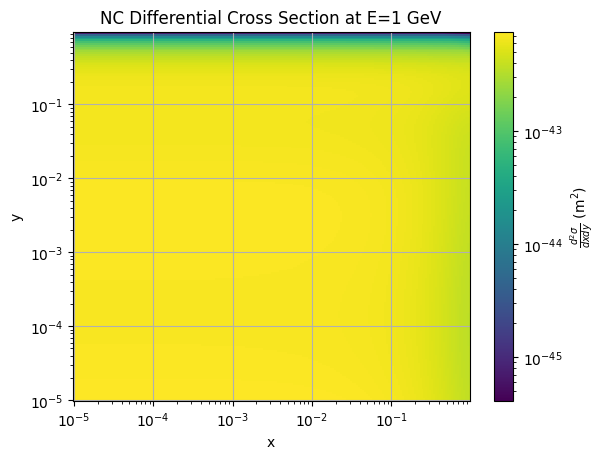

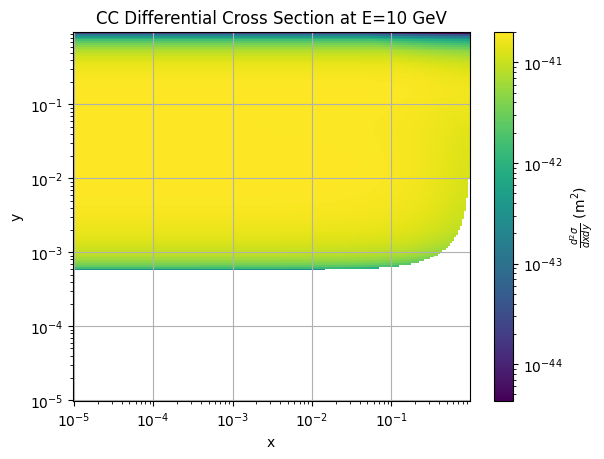

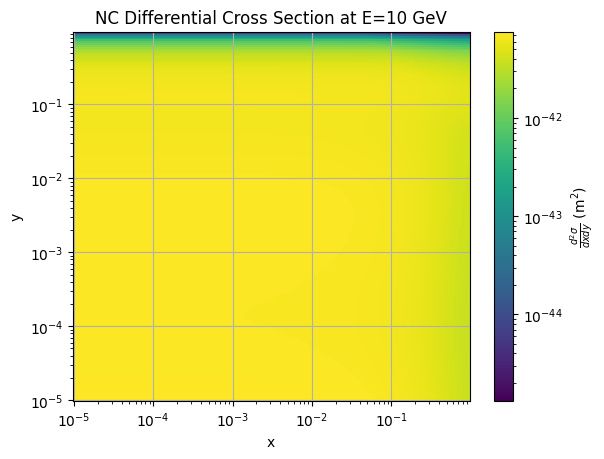

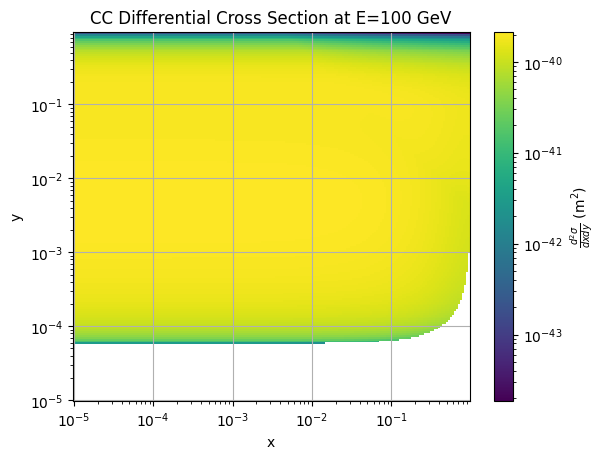

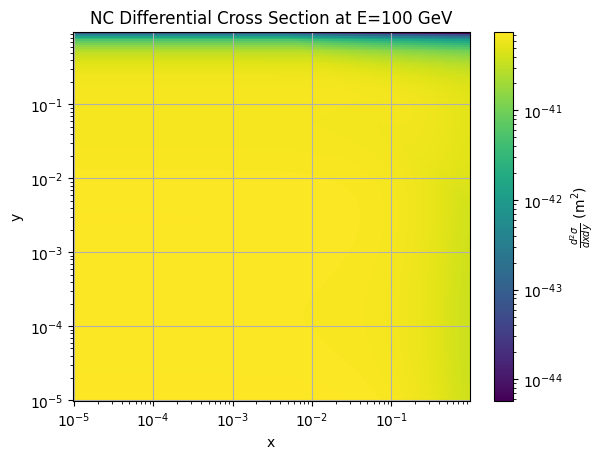

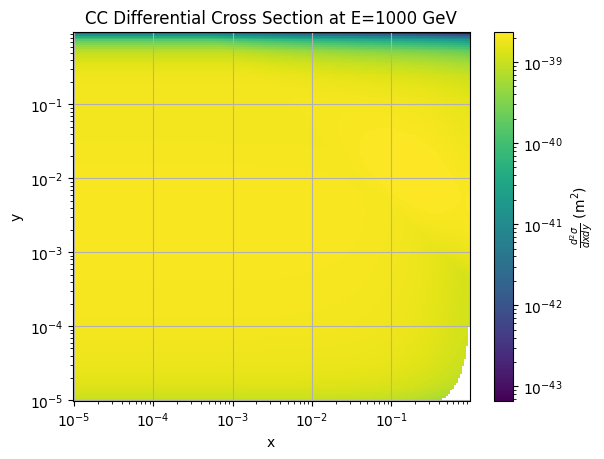

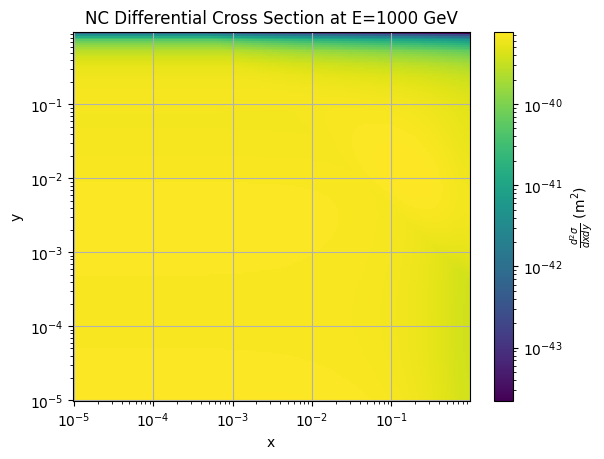

In [ ]:
# plot the differntial cross section at a few energies
energies = [1, 10, 100, 1000] # GeV
for E in energies:
    for dxs, label in zip([dxs_CC, dxs_NC], ["CC", "NC"]):
        data = dxs[dxs[:,0]==E]
        x = np.unique(data[:,1])
        y = np.unique(data[:,2])
        z = data[:,3].reshape(len(x), len(y))
        jac = np.outer(x, y)
        plt.pcolor(x,y,z/jac, norm=LogNorm(vmin=z[z>0].min(), vmax=z.max()), cmap='viridis')
        plt.title(f"{label} Differential Cross Section at E={E} GeV")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.colorbar(label=r"$\frac{d^2\sigma}{dx dy}$ (m$^2$)")
        plt.loglog()
        plt.grid()
        plt.show()